In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict

https://blog.eleuther.ai/multiple-choice-normalization/

Byte-length normalized: The score of continuation is determined using
, where is the number of bytes represented by the token . This approach attempts to normalize for length by computing average log probability per character, which ensures that it is tokenization agnostic. This approach is also used by eval harness in all multiple choice tasks and presented as acc_norm.

In [33]:
data_llama = {}
for result in llama_results:
    for score in ["BLEU", "BERTScore", "COMET"]:
        data_llama[(score, result["Score"])] = result[score]

In [34]:
data_llama

{('BLEU', 'HellaSwag'): '0.49',
 ('BERTScore', 'HellaSwag'): '0.95',
 ('COMET', 'HellaSwag'): '0.74',
 ('BLEU', 'HellaSwag Norm'): '0.51',
 ('BERTScore', 'HellaSwag Norm'): '0.96',
 ('COMET', 'HellaSwag Norm'): '0.76',
 ('BLEU', 'MMLU'): '0.55',
 ('BERTScore', 'MMLU'): '0.97',
 ('COMET', 'MMLU'): '0.72',
 ('BLEU', 'MMLU Norm'): '0.56',
 ('BERTScore', 'MMLU Norm'): '0.96',
 ('COMET', 'MMLU Norm'): '0.67',
 ('BLEU', 'ARC-Challenge'): '0.61',
 ('BERTScore', 'ARC-Challenge'): '0.88',
 ('COMET', 'ARC-Challenge'): '0.87',
 ('BLEU', 'ARC-Challenge Norm'): '0.49',
 ('BERTScore', 'ARC-Challenge Norm'): '0.94',
 ('COMET', 'ARC-Challenge Norm'): '0.82'}

In [2]:
llama_results =  [
    {
        "Score": "HellaSwag",
        "BLEU": "0.49",
        "BERTScore": "0.95",
        "COMET": "0.74"
    },
    {
        "Score": "HellaSwag Norm",
        "BLEU": "0.51",
        "BERTScore": "0.96",
        "COMET": "0.76"
    },
    {
        "Score": "MMLU",
        "BLEU": "0.55",
        "BERTScore": "0.97",
        "COMET": "0.72"
    },
    {
        "Score": "MMLU Norm",
        "BLEU": "0.56",
        "BERTScore": "0.96",
        "COMET": "0.67"
    },
    {
        "Score": "ARC-Challenge",
        "BLEU": "0.61",
        "BERTScore": "0.88",
        "COMET": "0.87"
    },
    {
        "Score": "ARC-Challenge Norm",
        "BLEU": "0.49",
        "BERTScore": "0.94",
        "COMET": "0.82"
    }
]

In [35]:
data_mistral = {}
for result in mistral_results:
    for score in ["BLEU", "BERTScore", "COMET"]:
        data_mistral[(score, result["Score"])] = result[score]

In [36]:
data_mistral

{('BLEU', 'HellaSwag'): '0.13',
 ('BERTScore', 'HellaSwag'): '0.95',
 ('COMET', 'HellaSwag'): '0.73',
 ('BLEU', 'HellaSwag Norm'): '0.15',
 ('BERTScore', 'HellaSwag Norm'): '0.95',
 ('COMET', 'HellaSwag Norm'): '0.75',
 ('BLEU', 'MMLU'): '0.04',
 ('BERTScore', 'MMLU'): '0.91',
 ('COMET', 'MMLU'): '0.63',
 ('BLEU', 'MMLU Norm'): '0.14',
 ('BERTScore', 'MMLU Norm'): '0.94',
 ('COMET', 'MMLU Norm'): '0.69',
 ('BLEU', 'ARC-Challenge'): '0.32',
 ('BERTScore', 'ARC-Challenge'): '0.99',
 ('COMET', 'ARC-Challenge'): '0.84',
 ('BLEU', 'ARC-Challenge Norm'): '0.24',
 ('BERTScore', 'ARC-Challenge Norm'): '0.97',
 ('COMET', 'ARC-Challenge Norm'): '0.74'}

In [3]:
mistral_results = [
    {
        "Score": "HellaSwag",
        "BLEU": "0.13",
        "BERTScore": "0.95",
        "COMET": "0.73"
    },
    {
        "Score": "HellaSwag Norm",
        "BLEU": "0.15",
        "BERTScore": "0.95",
        "COMET": "0.75"
    },
    {
        "Score": "MMLU",
        "BLEU": "0.04",
        "BERTScore": "0.91",
        "COMET": "0.63"
    },
    {
        "Score": "MMLU Norm",
        "BLEU": "0.14",
        "BERTScore": "0.94",
        "COMET": "0.69"
    },
    {
        "Score": "ARC-Challenge",
        "BLEU": "0.32",
        "BERTScore": "0.99",
        "COMET": "0.84"
    },
    {
        "Score": "ARC-Challenge Norm",
        "BLEU": "0.24",
        "BERTScore": "0.97",
        "COMET": "0.74"
    }
]

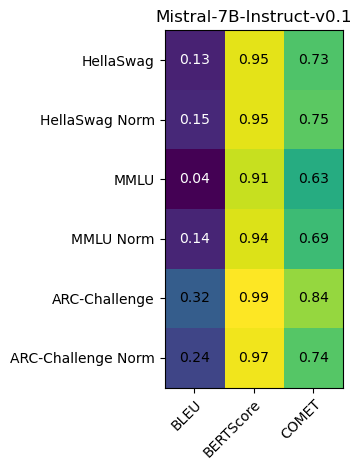

In [37]:
# heatmap plot

v_context_map = {        
    "BLEU": 0,
    "BERTScore": 1,
    "COMET": 2,
}

x_labels = list(v_context_map.keys())

t_context_map = {
    "HellaSwag": 0,
    "HellaSwag Norm": 1,
    "MMLU": 2,
    "MMLU Norm": 3,
    "ARC-Challenge": 4,
    "ARC-Challenge Norm": 5
}
 
y_labels = (t_context_map.keys())

harvest = np.zeros((len(t_context_map), len(v_context_map)))
norm_harvest = np.zeros((len(t_context_map), len(v_context_map)))

# max_value = max(data.values())
# min_value = min(data.values())

max_value = 1.0
min_value = 0.0

for (v_context, t_context), value in data_mistral.items(): 
    i = t_context_map[t_context]
    j = v_context_map[v_context]
    harvest[i,j] = value
    norm_harvest[i,j] = value
    
fig, axis = plt.subplots()

im = axis.imshow(norm_harvest)
# cbar = fig.colorbar(im, ax=axis)

axis.set_xticks(range(len(v_context_map)))
axis.set_yticks(range(len(t_context_map)))
axis.set_xticklabels(x_labels, minor=False)
axis.set_yticklabels(y_labels, minor=False)

# Rotate the tick labels and set their alignment.
plt.setp(axis.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(t_context_map)):
    for j in range(len(v_context_map)):
        text = axis.text(
            j, i, round(harvest[i, j], 2), ha="center", va="center",
            color="white" if norm_harvest[i, j] <= 0.2 else "black",
        )

axis.set_title(r"Mistral-7B-Instruct-v0.1")
fig.tight_layout()
plt.show()
fig.savefig("mistral_corr.pdf")

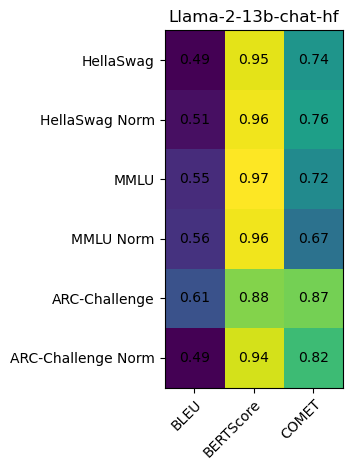

In [39]:
# heatmap plot

v_context_map = {        
    "BLEU": 0,
    "BERTScore": 1,
    "COMET": 2,
}

x_labels = list(v_context_map.keys())

t_context_map = {
    "HellaSwag": 0,
    "HellaSwag Norm": 1,
    "MMLU": 2,
    "MMLU Norm": 3,
    "ARC-Challenge": 4,
    "ARC-Challenge Norm": 5
}
 
y_labels = (t_context_map.keys())

harvest = np.zeros((len(t_context_map), len(v_context_map)))
norm_harvest = np.zeros((len(t_context_map), len(v_context_map)))

# max_value = max(data.values())
# min_value = min(data.values())

max_value = 1.0
min_value = 0.0

for (v_context, t_context), value in data_llama.items(): 
    i = t_context_map[t_context]
    j = v_context_map[v_context]
    harvest[i,j] = value
    norm_harvest[i,j] = value
    
fig, axis = plt.subplots()

im = axis.imshow(norm_harvest)
# cbar = fig.colorbar(im, ax=axis)

axis.set_xticks(range(len(v_context_map)))
axis.set_yticks(range(len(t_context_map)))
axis.set_xticklabels(x_labels, minor=False)
axis.set_yticklabels(y_labels, minor=False)

# Rotate the tick labels and set their alignment.
plt.setp(axis.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(t_context_map)):
    for j in range(len(v_context_map)):
        text = axis.text(
            j, i, round(harvest[i, j], 2), ha="center", va="center",
            color="white" if norm_harvest[i, j] <= 0.2 else "black",
        )

axis.set_title("Llama-2-13b-chat-hf")
fig.tight_layout()
plt.show()
fig.savefig("llama2-corr.pdf")